In [1]:
import pysam
import os
import numpy as np

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from scipy import ndimage

In [44]:
ssr = pysam.AlignmentFile("data/SRR_final_sorted.bam", "rb")

In [45]:
a = ssr.count_coverage("chr1", 0, 700_000_000)

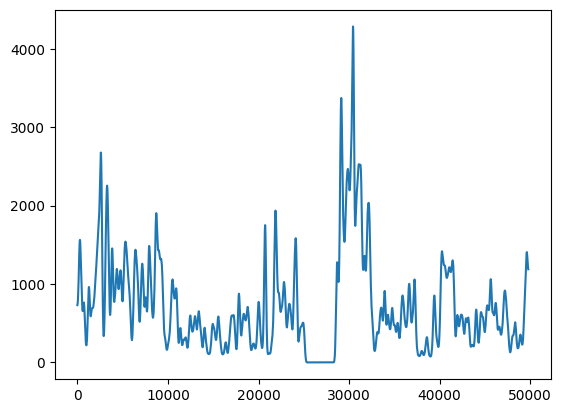

In [47]:
plt.plot(ndimage.gaussian_filter1d([el.sum() for el in np.array_split(np.array(a).sum(axis=0), int(len(a[0])/5_000))], 100))

In [7]:
aa = [el.sum() for el in np.array_split(np.array(a).sum(axis=0), int(len(a[0])/5_000))]

In [8]:
aaa = ndimage.gaussian_filter1d(aa, 100)
np.quantile(aaa, .05), np.quantile(aaa, .95),

(0.0, 1991.0)

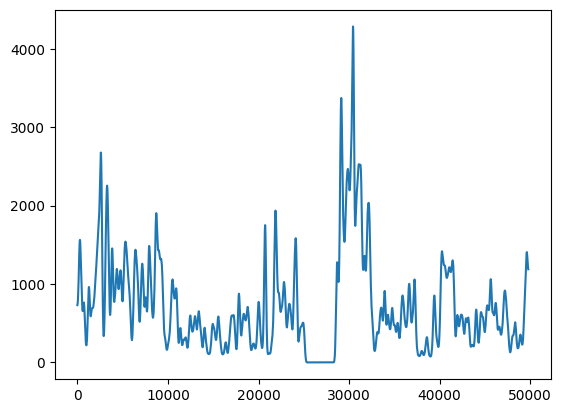

In [9]:
plt.plot(aaa)

In [10]:
np.sum(aaa <= 0.0)

2908

In [11]:
np.sum(aaa >= 1991.0)

2491

In [12]:
ssr2 = pysam.AlignmentFile("data/GRCH38.bam", "rb")

[W::hts_idx_load3] The index file is older than the data file: data/GRCH38.bam.bai


In [13]:
b = ssr2.count_coverage("chr1", 0, 700_000_000)

In [14]:
bb = [el.sum() for el in np.array_split(np.array(b).sum(axis=0), int(len(b[0])/5_000))]

In [21]:
bbb = ndimage.gaussian_filter1d(bb, 100)
bbbb = bbb[bbb > 0]
np.quantile(bbbb, .05), np.quantile(bbbb, .95),

(39766.0, 43748.0)

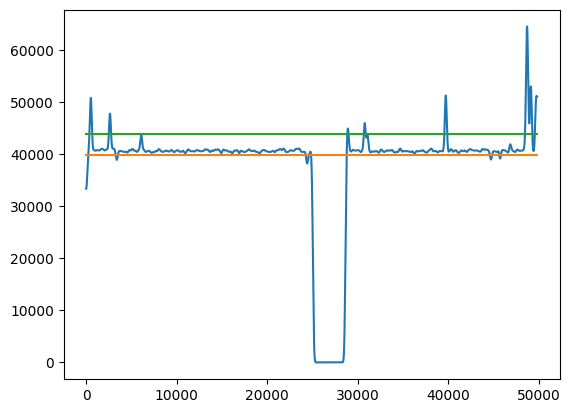

In [27]:
plt.plot(bbb)
plt.plot([0, len(bbb)], [np.quantile(bbbb, .05)] * 2)
plt.plot([0, len(bbb)], [np.quantile(bbbb, .95)] * 2)

In [39]:
np.where(aaa == 0)

(array([25368, 25369, 25370, ..., 28273, 28274, 28275]),)

In [40]:
7.4 * 1_000_000/5_000

1480.0

In [42]:
aaaa = np.concatenate((aaa[:25368], aaa[28275:]))

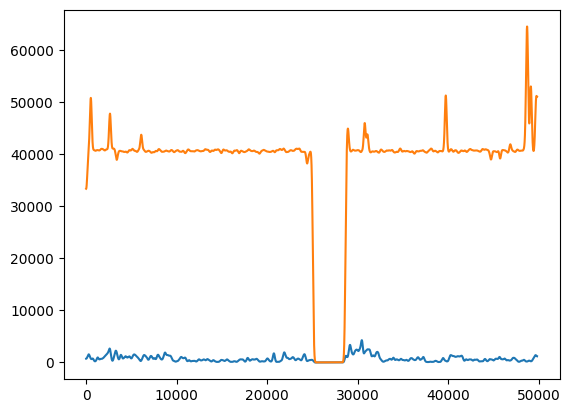

In [17]:
plt.plot(aaa)
plt.plot(bbb)
plt.show()

In [48]:
np.mean(aaaa)

761.6439723573073

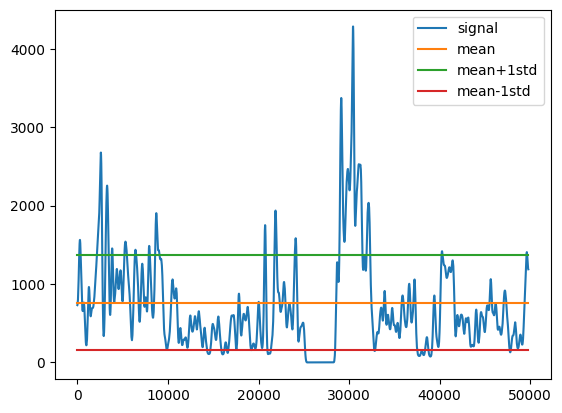

In [57]:
plt.plot(aaa)
plt.plot([0, len(aaa)], [np.mean(aaaa)] * 2)
plt.plot([0, len(aaa)], [np.mean(aaaa) + np.std(aaaa)] * 2)
plt.plot([0, len(aaa)], [np.mean(aaaa) - np.std(aaaa)] * 2)
plt.legend(["signal", "mean", "mean+1std", "mean-1std"])
plt.show()

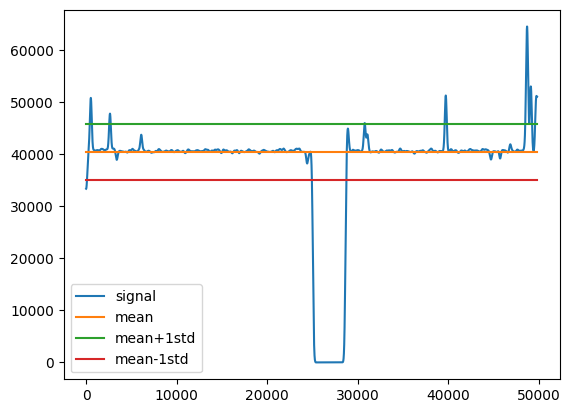

In [58]:
plt.plot(bbb)
plt.plot([0, len(bbb)], [np.mean(bbbb)] * 2)
plt.plot([0, len(bbb)], [np.mean(bbbb) + np.std(bbbb)] * 2)
plt.plot([0, len(bbb)], [np.mean(bbbb) - np.std(bbbb)] * 2)
plt.legend(["signal", "mean", "mean+1std", "mean-1std"])
plt.show()